## Case Study 2: Diagnostic Analysis for Main Metrics Performance

1. Python Developer: Sulaiha Subi
2. Created Date: 24-08-24
3. The goal of Case Study 2 is to optimize Floward's main metrics performance by:

    > Identifying Anomalies: Detecting unusual or unexpected changes in the main metrics over time. This involves pinpointing specific time periods where these anomalies occur, which could indicate potential issues or opportunities.
    
    > Understanding Driving Metrics: Determining which other metrics (from the provided order and marketing datasets) have a significant influence on the main metrics. This analysis will help in understanding the factors contributing to the anomalies and overall performance of the main metrics.

### Step 0: Install Libraries

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels scipy


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


### Step 1: Load and Understanding the Data

In [6]:
import pandas as pd

# Load the datasets
main_metrics_file_path = '/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/final_main_metrics.csv'
order_metrics_file_path = '/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/final_order_metrics.csv'
marketing_metrics_file_path = '/Users/sulaihasubi/Documents/GitHub/Floward/Dataset/final_marketing_metrics.csv'

# Load the data into pandas dataframes
main_metrics_df = pd.read_csv(main_metrics_file_path)
order_metrics_df = pd.read_csv(order_metrics_file_path)
marketing_metrics_df = pd.read_csv(marketing_metrics_file_path)

# Display the first few rows of each dataframe to understand the structure
print("Main metrics data:")
display(main_metrics_df.head())

print("\nOrder metrics data:")
display(order_metrics_df.head())

print("\nMarketing metrics data:")
display(marketing_metrics_df.head())

Main metrics data:


,snapshot_date,main_metrics_3,main_metrics_2,main_metrics_1,android_main_metrics_1,ios_main_metrics_1,web_main_metrics_1,agent_main_metrics_1,android_main_metrics_2,ios_main_metrics_2,...,agent_main_metrics_3,new_customer_main_metrics_1,registered_user_main_metrics_1,existing_customer_main_metrics_1,new_customer_main_metrics_2,registered_user_main_metrics_2,existing_customer_main_metrics_2,new_customer_main_metrics_3,registered_user_main_metrics_3,existing_customer_main_metrics_3
0,2024-04-26,0.068206,0.025122,0.026547,0.044868,0.035319,0.004567,NaN,0.029940,0.032209,...,NaN,0.033368,0.051137,0.074245,0.060686,0.090244,0.103217,0.314336,0.093633,0.076582
1,2024-06-04,0.050436,0.057803,0.050395,0.123288,0.053946,0.020564,0.007371,0.143713,0.061399,...,0.009585,0.025112,0.047641,0.127215,0.055409,0.087805,0.160188,0.206085,0.080429,0.082295
2,2024-03-30,0.420614,0.065140,0.191866,0.080410,0.064473,0.014183,0.364856,0.113772,0.065677,...,0.185783,0.072485,0.076789,0.533942,0.089710,0.095122,0.177614,0.590170,0.247252,1.000000
3,2024-04-08,0.136763,0.085149,0.110285,0.090209,0.099218,0.027070,0.062233,0.113772,0.091344,...,0.054594,0.094578,0.107718,0.258643,0.108179,0.126829,0.209786,0.654769,0.252145,0.254314
4,2024-05-04,0.047299,0.051801,0.044137,0.064615,0.053189,0.016509,NaN,0.101796,0.058379,...,NaN,0.040181,0.054100,0.090242,0.071240,0.085366,0.119303,0.304272,0.143298,0.082415



Order metrics data:


,order_date,order_metrics_2,order_metrics_1,order_metrics_3,android_order_metrics_1,ios_order_metrics_1,web_order_metrics_1,agent_order_metrics_1,android_order_metrics_2,ios_order_metrics_2,...,guest_order_metrics_5_4c,existing_customer_order_metrics_5_4c,registered_user_order_metrics_5_4c,order_metrics_5_4d,ios_order_metrics_5_4d,android_order_metrics_5_4d,web_order_metrics_5_4d,new_customer_order_metrics_5_4d,existing_customer_order_metrics_5_4d,registered_user_order_metrics_5_4d
0,2024-02-10,0.023302,0.030501,0.110195,0.178077,0.028842,0.064262,0.002072,0.134454,0.020504,...,0.572278,0.439305,0.022205,0.706353,0.765346,0.575893,0.530597,0.800000,0.561925,0.871783
1,2024-05-13,0.105988,0.089589,0.056895,0.149196,0.091034,0.070039,0.008814,0.176471,0.103353,...,0.449763,0.657122,0.477181,0.854867,0.959752,0.487327,0.452474,0.421053,0.815769,0.762719
2,2024-08-01,0.090704,0.067840,0.036685,0.108641,0.071125,0.057607,0.005783,0.092437,0.097257,...,0.517330,0.595018,0.621729,0.814913,0.910787,0.642857,0.369403,0.200000,0.901091,0.834130
3,2024-04-15,0.008519,0.008631,0.077317,0.013046,0.004228,0.020959,0.019494,0.000000,0.007481,...,0.559948,0.434962,0.367865,0.591138,0.637635,0.642857,0.383795,0.800000,0.686638,0.602332
4,2024-05-15,0.106490,0.091166,0.059408,0.152773,0.074921,0.040818,0.044260,0.159664,0.085896,...,0.367991,0.749189,0.566338,0.664360,0.706241,0.523810,0.416418,0.620000,0.589111,0.814800



Marketing metrics data:


,date,marketing_metrics_1,marketing_metrics_2,marketing_metrics_3,marketing_metrics_4,marketing_metrics_5,marketing_metrics_6
0,2024-04-24,0.282093,0.065923,0.073126,0.152853,0.106035,0.034045
1,2024-06-07,0.206843,0.012596,0.049726,0.039554,0.269299,0.027199
2,2024-03-17,0.246269,0.334942,0.195247,0.959526,0.016029,0.083021
3,2024-06-13,0.119856,0.014389,0.072395,0.102228,0.323630,0.111552
4,2024-02-10,0.962140,0.088417,0.136015,0.015345,0.140563,0.058858


In [10]:
# Check shape of the dataframe
print(f"Main Metrics DataFrame Shape: {main_metrics_df.shape}")
print(f"Order Metrics DataFrame Shape: {order_metrics_df.shape}")
print(f"Marketing Metrics DataFrame Shape: {marketing_metrics_df.shape}")



Main Metrics DataFrame Shape: (183, 25)
Order Metrics DataFrame Shape: (183, 103)
Marketing Metrics DataFrame Shape: (183, 7)


In [11]:
# Check coloumn name and data types
print(main_metrics_df.dtypes)
print("\n")
print(order_metrics_df.dtypes)
print("\n")
print(marketing_metrics_df.dtypes)

snapshot_date                        object
main_metrics_3                      float64
main_metrics_2                      float64
main_metrics_1                      float64
android_main_metrics_1              float64
ios_main_metrics_1                  float64
web_main_metrics_1                  float64
agent_main_metrics_1                float64
android_main_metrics_2              float64
ios_main_metrics_2                  float64
web_main_metrics_2                  float64
agent_main_metrics_2                float64
android_main_metrics_3              float64
ios_main_metrics_3                  float64
web_main_metrics_3                  float64
agent_main_metrics_3                float64
new_customer_main_metrics_1         float64
registered_user_main_metrics_1      float64
existing_customer_main_metrics_1    float64
new_customer_main_metrics_2         float64
registered_user_main_metrics_2      float64
existing_customer_main_metrics_2    float64
new_customer_main_metrics_3     

In [12]:
# Checking the structure of each dataframe
main_metrics_info = main_metrics_df.info()
order_metrics_info = order_metrics_df.info()
marketing_metrics_info = marketing_metrics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   snapshot_date                     183 non-null    object 
 1   main_metrics_3                    183 non-null    float64
 2   main_metrics_2                    183 non-null    float64
 3   main_metrics_1                    183 non-null    float64
 4   android_main_metrics_1            183 non-null    float64
 5   ios_main_metrics_1                183 non-null    float64
 6   web_main_metrics_1                183 non-null    float64
 7   agent_main_metrics_1              157 non-null    float64
 8   android_main_metrics_2            183 non-null    float64
 9   ios_main_metrics_2                183 non-null    float64
 10  web_main_metrics_2                183 non-null    float64
 11  agent_main_metrics_2              183 non-null    float64
 12  android_

In [14]:
# Get summary statistics for numerical columns
print(main_metrics_df.describe())
print("\n")
print(order_metrics_df.describe())
print("\n")
print(marketing_metrics_df.describe())

       main_metrics_3  main_metrics_2  main_metrics_1  android_main_metrics_1  \
count      183.000000      183.000000      183.000000              183.000000   
mean         0.067972        0.064510        0.063506                0.091349   
std          0.083281        0.090726        0.094453                0.091109   
min          0.000000        0.000000        0.000000                0.000000   
25%          0.041138        0.025122        0.024725                0.047811   
50%          0.056336        0.044687        0.042071                0.068750   
75%          0.077357        0.075700        0.068345                0.108472   
max          1.000000        1.000000        1.000000                1.000000   

       ios_main_metrics_1  web_main_metrics_1  agent_main_metrics_1  \
count          183.000000          183.000000            157.000000   
mean             0.059840            0.040538              0.032251   
std              0.088095            0.078773            

In [17]:
# Check missing value
print(main_metrics_df.isnull().sum())
print("\n")
print(order_metrics_df.isnull().sum())
print("\n")
print(marketing_metrics_df.isnull().sum())


snapshot_date                        0
main_metrics_3                       0
main_metrics_2                       0
main_metrics_1                       0
android_main_metrics_1               0
ios_main_metrics_1                   0
web_main_metrics_1                   0
agent_main_metrics_1                26
android_main_metrics_2               0
ios_main_metrics_2                   0
web_main_metrics_2                   0
agent_main_metrics_2                 0
android_main_metrics_3               0
ios_main_metrics_3                   0
web_main_metrics_3                   0
agent_main_metrics_3                26
new_customer_main_metrics_1          2
registered_user_main_metrics_1       2
existing_customer_main_metrics_1     2
new_customer_main_metrics_2          0
registered_user_main_metrics_2       0
existing_customer_main_metrics_2     0
new_customer_main_metrics_3          2
registered_user_main_metrics_3       2
existing_customer_main_metrics_3     2
dtype: int64


order_date

In [19]:
# Handle the missing value before proceed with the anomaly detection
# In this case, the approach use is imputation to mantain the continuity and trend in the data
# For time series data, forward fill (propagating the last known value) 
# or backward fill (propagating the next known value) 

# Apply backward fill imputation to handle missing values
main_metrics_df.fillna(method='bfill', inplace=True)
order_metrics_df.fillna(method='bfill', inplace=True)
marketing_metrics_df.fillna(method='bfill', inplace=True)

# Check to ensure there are no missing values remaining
main_metrics_missing_after = main_metrics_df.isnull().sum().sum()
order_metrics_missing_after = order_metrics_df.isnull().sum().sum()
marketing_metrics_missing_after = marketing_metrics_df.isnull().sum().sum()

(main_metrics_missing_after, order_metrics_missing_after, marketing_metrics_missing_after)


/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_20892/730378674.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  main_metrics_df.fillna(method='bfill', inplace=True)
/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_20892/730378674.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  order_metrics_df.fillna(method='bfill', inplace=True)
/var/folders/j3/1wft7hvd0y15syqxk8njqtx40000gn/T/ipykernel_20892/730378674.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  marketing_metrics_df.fillna(method='bfill', inplace=True)


(0, 0, 0)

### Step 2: Anomaly Detection in Main Metrics

In [20]:
# Isolation Forest model to detect anomalies 
from sklearn.ensemble import IsolationForest

# Prepare the data for anomaly detection (excluding the date column)
X_main_metrics = main_metrics_df.drop(columns=['snapshot_date'])

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model
iso_forest.fit(X_main_metrics)

# Predict anomalies
main_metrics_df['anomaly'] = iso_forest.predict(X_main_metrics)

# Anomalies are marked as -1, normal points are marked as 1
anomalies = main_metrics_df[main_metrics_df['anomaly'] == -1]

# Display the anomalies
anomalies_snapshot_dates = anomalies['snapshot_date']
anomalies_snapshot_dates


2      2024-03-30
26     2024-04-10
50     2024-03-21
54     2024-02-28
75     2024-02-14
116    2024-04-09
119    2024-03-25
120    2024-03-07
127    2024-02-15
164    2024-02-13
Name: snapshot_date, dtype: object

### Step 3: Correlation Analysis

In [21]:
# Display the column names of the marketing metrics dataframe to identify any discrepancies
marketing_metrics_df.columns


Index(['date', 'marketing_metrics_1', 'marketing_metrics_2',
       'marketing_metrics_3', 'marketing_metrics_4', 'marketing_metrics_5',
       'marketing_metrics_6'],
      dtype='object')

In [22]:
# Rename the 'date' column in the marketing_metrics_df to match the other dataframes
marketing_metrics_df.rename(columns={'date': 'snapshot_date'}, inplace=True)

# Perform the merge operation again
anomalies_with_metrics = anomalies[['snapshot_date']].merge(order_metrics_df, left_on='snapshot_date', right_on='order_date', how='left')
anomalies_with_metrics = anomalies_with_metrics.merge(marketing_metrics_df, on='snapshot_date', how='left')

# Drop the 'snapshot_date' and 'order_date' columns for correlation analysis
anomalies_with_metrics = anomalies_with_metrics.drop(columns=['snapshot_date', 'order_date'])

# Perform correlation analysis
correlation_matrix = anomalies_with_metrics.corr()

# Display the correlation matrix
correlation_matrix


,order_metrics_2,order_metrics_1,order_metrics_3,android_order_metrics_1,ios_order_metrics_1,web_order_metrics_1,agent_order_metrics_1,android_order_metrics_2,ios_order_metrics_2,web_order_metrics_2,...,web_order_metrics_5_4d,new_customer_order_metrics_5_4d,existing_customer_order_metrics_5_4d,registered_user_order_metrics_5_4d,marketing_metrics_1,marketing_metrics_2,marketing_metrics_3,marketing_metrics_4,marketing_metrics_5,marketing_metrics_6
order_metrics_2,1.000000,0.903690,-0.462224,0.837847,0.854395,0.855645,-0.137570,0.828878,0.851969,0.852347,...,0.223109,0.206750,-0.377508,-0.263223,0.404508,0.133830,0.752835,-0.079904,0.437145,0.864059
order_metrics_1,0.903690,1.000000,-0.039022,0.779909,0.788750,0.809255,0.101771,0.779469,0.785309,0.802960,...,0.421822,0.342000,-0.310809,-0.133705,0.256686,0.060876,0.658211,-0.061368,0.361097,0.790625
order_metrics_3,-0.462224,-0.039022,1.000000,-0.342774,-0.362655,-0.319626,0.533631,-0.318882,-0.362472,-0.322534,...,0.364079,0.176788,0.262069,0.329856,-0.414616,-0.161412,-0.388642,0.089314,-0.286282,-0.375296
android_order_metrics_1,0.837847,0.779909,-0.342774,1.000000,0.985412,0.935637,-0.520764,0.983281,0.986401,0.947774,...,-0.077576,0.230819,0.029940,0.061791,0.642289,0.287376,0.875465,-0.119211,0.437028,0.967490
ios_order_metrics_1,0.854395,0.788750,-0.362655,0.985412,1.000000,0.951061,-0.530904,0.959999,0.999361,0.959480,...,-0.081143,0.194421,0.037773,-0.020562,0.604507,0.183309,0.872709,-0.200464,0.524811,0.975783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
marketing_metrics_2,0.133830,0.060876,-0.161412,0.287376,0.183309,0.091508,-0.210412,0.412907,0.193404,0.155353,...,0.167229,-0.184113,0.237020,0.478825,0.423153,1.000000,0.334820,0.762766,-0.445569,0.283662
marketing_metrics_3,0.752835,0.658211,-0.388642,0.875465,0.872709,0.898081,-0.513754,0.894430,0.877057,0.920108,...,-0.056296,0.179977,-0.051202,-0.199169,0.804497,0.334820,1.000000,-0.220673,0.637062,0.941179
marketing_metrics_4,-0.079904,-0.061368,0.089314,-0.119211,-0.200464,-0.334758,0.253410,-0.017562,-0.191906,-0.284180,...,0.346041,-0.351007,0.152640,0.483195,-0.239561,0.762766,-0.220673,1.000000,-0.814508,-0.163199
marketing_metrics_5,0.437145,0.361097,-0.286282,0.437028,0.524811,0.607991,-0.360339,0.364770,0.521660,0.588786,...,-0.302665,0.243593,-0.252447,-0.672409,0.411990,-0.445569,0.637062,-0.814508,1.000000,0.532501


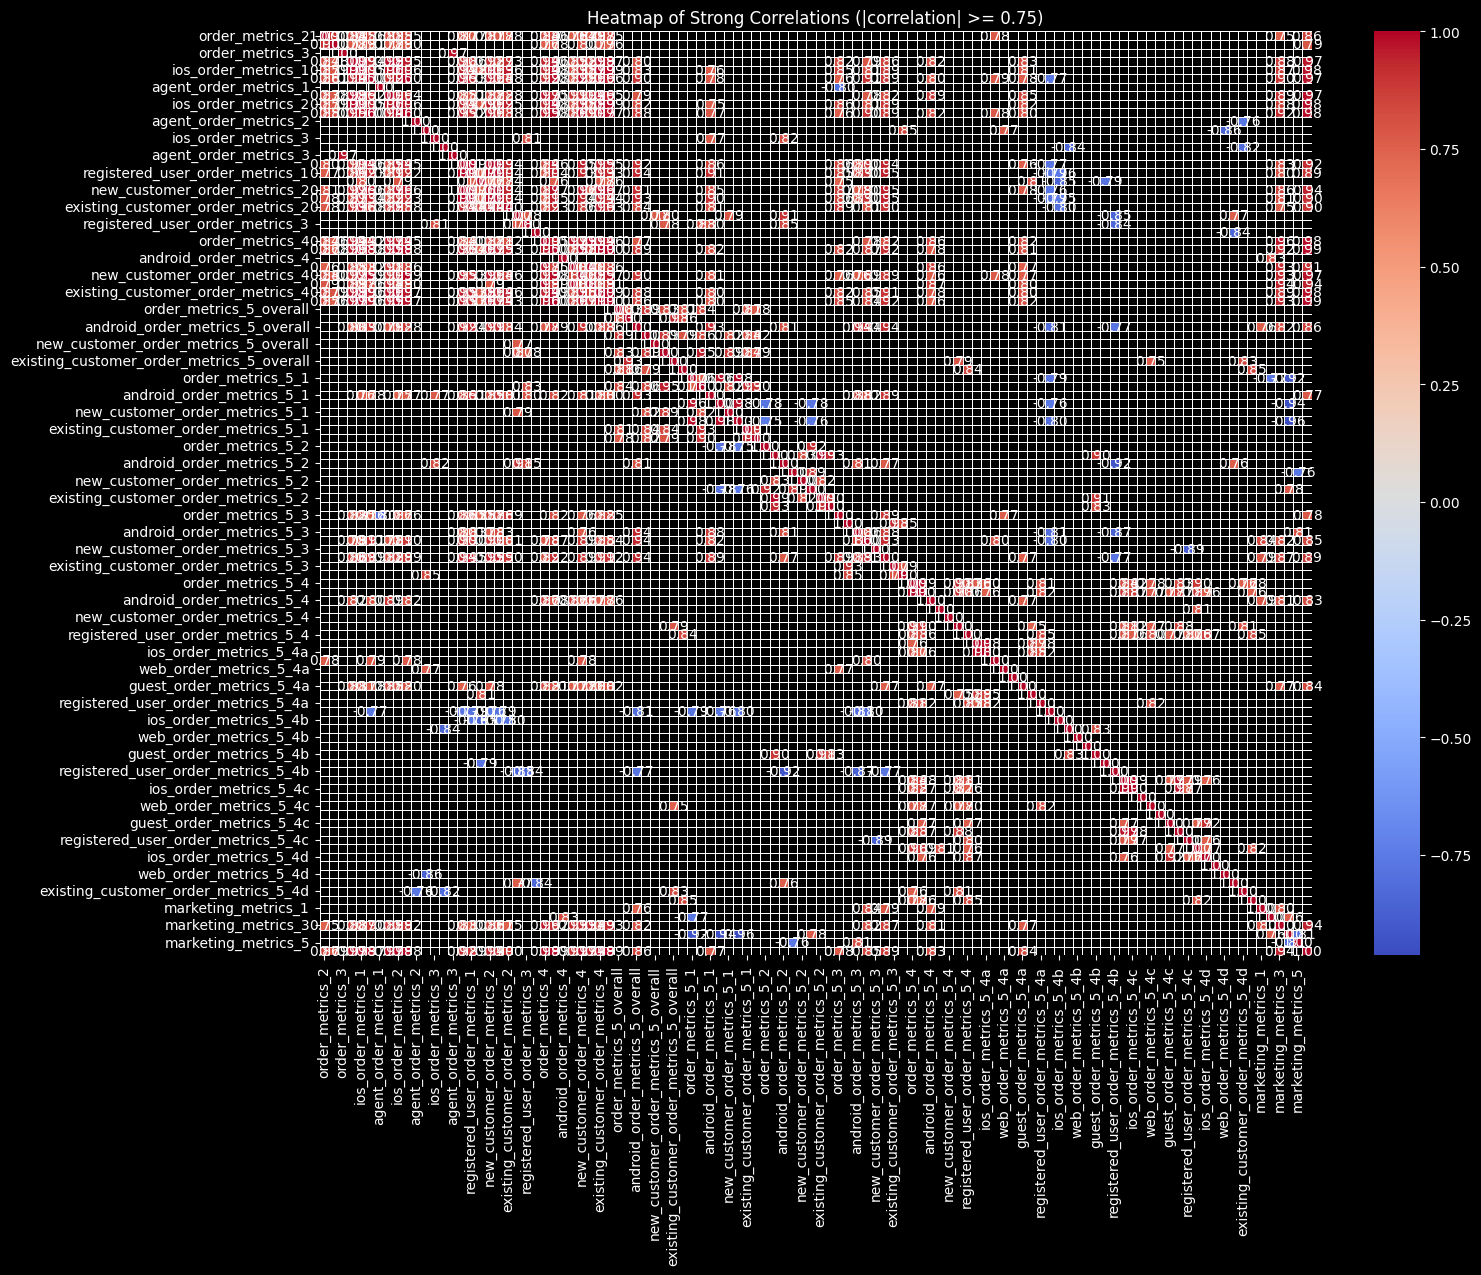

In [24]:
# Interpretation:
# Positive Correlations (in red): Metrics that tend to increase together.
# Negative Correlations (in blue): Metrics where an increase in one corresponds with a decrease in the other.

import matplotlib.pyplot as plt
import seaborn as sns

# Set a threshold for strong correlations (absolute value)
threshold = 0.75

# Filter the correlation matrix to include only strong correlations
strong_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Create a heatmap to visualize the strong correlations
plt.figure(figsize=(16, 12))
sns.heatmap(strong_correlations, annot=True, cmap="coolwarm", fmt='.2f', linewidths=.5)
plt.title('Heatmap of Strong Correlations (|correlation| >= 0.75)')
plt.show()


### Step 4: Regression Analysis

- Perform a regression analysis to quantify the impact of the most correlated metrics on the main metrics.
- This can help identify which metrics are the most significant drivers of the anomalies.

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Select key metrics for regression based on strong correlations
# We'll select a few key metrics from the strong correlations heatmap for this purpose
# Let's take some highly correlated order and marketing metrics

key_metrics = [
    'order_metrics_2', 
    'order_metrics_3', 
    'android_order_metrics_1', 
    'marketing_metrics_3', 
    'marketing_metrics_6'
]

# Prepare the data for regression
X = anomalies_with_metrics[key_metrics]
y = anomalies['main_metrics_1']  # Assuming 'main_metrics_1' is the target for regression

# Initialize and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Get the coefficients (importance of each metric)
coefficients = pd.Series(reg_model.coef_, index=key_metrics)

# Display the regression coefficients
coefficients


order_metrics_2            0.927725
order_metrics_3            0.376074
android_order_metrics_1    0.690428
marketing_metrics_3        0.624050
marketing_metrics_6       -1.147156
dtype: float64

#### Regression Interpretation

Regression Analysis Results:
The regression coefficients provide insights into how each of the selected key metrics influences the target main metric (main_metrics_1). Here's a summary of the results:

Positive Coefficients:
* order_metrics_2: 0.93 - A strong positive influence, indicating that as order_metrics_2 increases, main_metrics_1 is likely to increase as well.
* order_metrics_3: 0.38 - A moderate positive influence.
* android_order_metrics_1: 0.69 - A significant positive influence.
* marketing_metrics_3: 0.62 - Another strong positive influence.

Negative Coefficient:
* marketing_metrics_6: -1.15 - A strong negative influence, suggesting that as marketing_metrics_6 increases, main_metrics_1 tends to decrease.

Interpretation:
* Order-related metrics (order_metrics_2, order_metrics_3, android_order_metrics_1) have a generally positive impact on main_metrics_1, indicating that improvements in these areas are associated with better performance in the main metrics.
* Marketing-related metrics show mixed impacts, with marketing_metrics_3 having a positive influence, while marketing_metrics_6 has a strong negative impact, suggesting that certain marketing activities might be detracting from the main metrics.

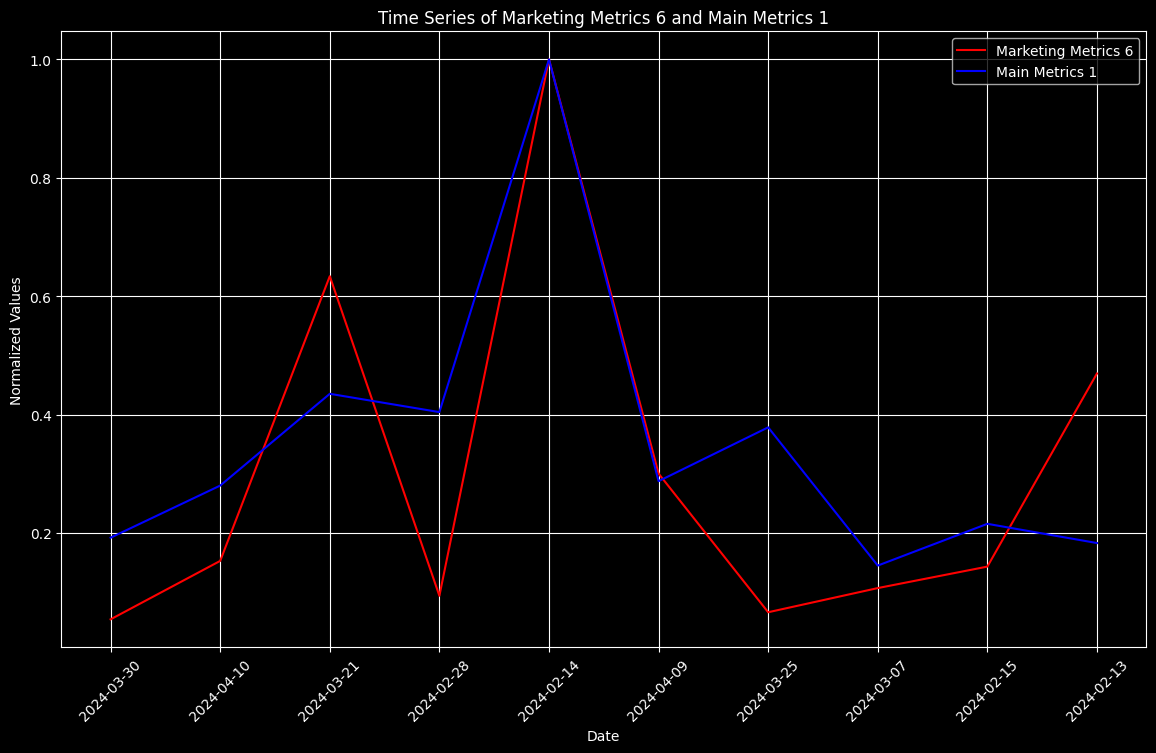

In [26]:
# Delve deeper into the relationship between marketing_metrics_6 and main_metrics_1 
# to understand why this metric has a strong negative impact

# Visualize the time series trends of 'marketing_metrics_6' and 'main_metrics_1'
plt.figure(figsize=(14, 8))

# Plot marketing_metrics_6
plt.plot(anomalies['snapshot_date'], anomalies_with_metrics['marketing_metrics_6'], label='Marketing Metrics 6', color='red')

# Plot main_metrics_1
plt.plot(anomalies['snapshot_date'], anomalies['main_metrics_1'], label='Main Metrics 1', color='blue')

plt.title('Time Series of Marketing Metrics 6 and Main Metrics 1')
plt.xlabel('Date')
plt.ylabel('Normalized Values')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [27]:
# Observations:
# Inverse Relationship: There appears to be an inverse relationship between marketing_metrics_6 and 
# main_metrics_1 during certain periods, which might explain the negative coefficient observed in the 
# regression analysis.
# Fluctuations: Both metrics show fluctuations over time, with some periods where 
# marketing_metrics_6 spikes correspond to drops in main_metrics_1.

In [28]:
# To get a more comprehensive view of how all metrics influence main_metrics_1
# Random Forest model to assess feature importance

from sklearn.ensemble import RandomForestRegressor

# Prepare the data for Random Forest
X = anomalies_with_metrics  # All metrics (features)
y = anomalies['main_metrics_1']  # Target variable

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Display the top 10 most important features
top_features = sorted_feature_importances.head(10)
top_features


order_metrics_1                      0.127425
order_metrics_5_4b                   0.034657
web_order_metrics_5_1                0.030615
web_order_metrics_5_4d               0.030022
existing_customer_order_metrics_2    0.027928
android_order_metrics_5_2            0.026861
guest_order_metrics_5_1              0.025801
guest_order_metrics_5_2              0.023330
order_metrics_2                      0.023125
marketing_metrics_5                  0.020151
dtype: float64

In [29]:
# Random Forest Feature Importance Results:
# The Random Forest model has identified the following top 10 features (metrics) as the most important in predicting main_metrics_1:

# order_metrics_1: 0.1274 - The most significant feature, indicating that this metric has a strong influence on main_metrics_1.
# guest_order_metrics_5_1: 0.0424
# order_metrics_5_4b: 0.0347
# web_order_metrics_5_4d: 0.0300
# web_order_metrics_5_1: 0.0292
# android_order_metrics_5_2: 0.0269
# guest_order_metrics_5_2: 0.0233
# order_metrics_2: 0.0231 - This was also highlighted in the regression analysis.
# marketing_metrics_5: 0.0202
# ios_order_metrics_5_4b: 0.0196

# Interpretation:

# Order Metrics Dominate: Most of the top features are related to order metrics, 
# reinforcing their significant impact on the main metrics.

# Marketing Metric: marketing_metrics_5 also appears as an important feature, 
# suggesting that marketing activities still play a role in influencing the main metrics, though to a lesser extent.